# Calculating the Asset Swap Spread

The asset swap spread is widely used as measures of pure credit risk. In this notebook I calculate these quantities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils.FinError import FinError
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinDate import FinDate
from financepy.products.bonds.FinBond import FinBond, FinYieldConventions

####################################################################
TEMPORARY MESSAGE: Welcome to FinancePy!
This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY and without even the implied warranty of 
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. Furthermore,
this is an alpha version of FinancePy & so is in early development.
Users are requested to verify outputs and if any doubt is found 
users are requested to contact the author of FinancePy. 
###################################################################



In [3]:
maturityDate = FinDate(2027, 5, 15)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [4]:
bond = FinBond(maturityDate, coupon, freqType, accrualType, face)

In [5]:
bond.print()

MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE: 100.0


## Asset Swap Spread

To calculate the asset swap spread we need a Libor reference curve. I just create a simple flat curve.

In [6]:
from financepy.market.curves.FinFlatCurve import FinFlatCurve

In [7]:
liborFlatRate = 0.0275

In [8]:
settlementDate = FinDate(2017, 7, 21)

In [9]:
liborFlatCurve = FinFlatCurve(settlementDate, liborFlatRate, 2)

In [10]:
print(liborFlatCurve)

TIMES: DISCOUNT FACTORS
0.0: 0.9999999997268735
0.2564102564102564: 0.9930212212374406
0.5128205128205128: 0.9860911458278981
0.7692307692307692: 0.9792094338814465
1.0256410256410255: 0.972375747880177
1.282051282051282: 0.965589752661643
1.5384615384615383: 0.9588511154024231
1.7948717948717947: 0.9521595056017963
2.051282051282051: 0.9455145950655335
2.3076923076923075: 0.9389160578898003
2.564102564102564: 0.932363570445173
2.8205128205128203: 0.9258568113607663
3.0769230769230766: 0.9193954615084708
3.333333333333333: 0.9129792039873021
3.5897435897435894: 0.9066077241078573
3.846153846153846: 0.9002807093768811
4.102564102564102: 0.8939978494819398
4.358974358974359: 0.8877588362762016
4.615384615384615: 0.8815633637633229
4.871794871794871: 0.875411128082441
5.128205128205128: 0.8693018274932711
5.384615384615384: 0.8632351623613072
5.6410256410256405: 0.8572108351431256
5.897435897435897: 0.851228550371793
6.153846153846153: 0.8452880146423741
6.41025641025641: 0.83938893659754

To caluclate the ASW I need to know the clean price of the bond

In [11]:
cleanPrice = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

I then call a function passing in the date, price and curve

In [12]:
bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

-33.67080535984256

The bond ASW is negative so it is trading tighter than the Libor curve. I need to cheapen the bond to make the ASW positive.

In [13]:
cleanPrice = 93.382  # I specified face to be 100 

In [14]:
bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

38.508703367514684

To get date functionality you import FinDate

## Analysis of the Asset Swap Spread

We can use the vectorisations to do some basic analysis. First generate a vector of prices from 90 to 110 with 20 steps.

In [15]:
cleanPrices = np.linspace(75,125,20)

In [16]:
asws = bond.assetSwapSpread(settlementDate, cleanPrices, liborFlatCurve)

We can now plot the relationship.

Text(0, 0.5, 'Asset Swap Spread (bp)')

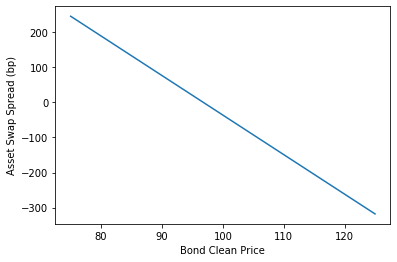

In [17]:
plt.plot(cleanPrices,asws*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("Asset Swap Spread (bp)")

This is nicely linear and decreasing - the higher the bond price the better its implied credit risk versus Libor discounting so the lower its asset swap spread.

## Asset Swap Spread Versus Discount Rate

In [18]:
liborFlatRates = np.linspace(0.01,0.04,20)

In [19]:
liborFlatCurves = FinFlatCurve(settlementDate, liborFlatRates, 1)

In [20]:
asws = bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurves)

Text(0, 0.5, 'Asset Swap Spread (bp)')

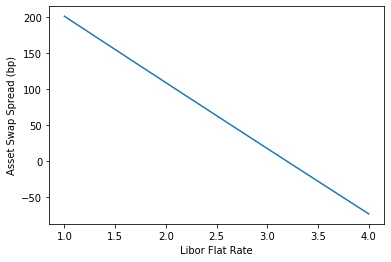

In [21]:
plt.plot(liborFlatRates*100,asws*10000)
plt.xlabel("Libor Flat Rate")
plt.ylabel("Asset Swap Spread (bp)")

Once again we see that the asset swap spread which measures the risk of the bond versus the Libor rate falls linearly with the increasing Libor rate.